### Working with skimage
Reading, displaying and saving images

In [1]:
#import libraries
import skimage
import skimage.io as skio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
image = skio.imread("data/chair.jpg")

In [3]:
print(image)

[[[127 122 100]
  [127 122 100]
  [128 122 100]
  ...
  [173 173 165]
  [173 174 166]
  [174 175 167]]

 [[127 122 100]
  [127 122 100]
  [128 122 100]
  ...
  [175 175 167]
  [175 176 168]
  [176 177 169]]

 [[128 122 100]
  [128 122 100]
  [127 121  99]
  ...
  [176 176 168]
  [175 176 168]
  [175 176 168]]

 ...

 [[ 93  83  74]
  [ 87  77  68]
  [ 83  73  64]
  ...
  [117  67  42]
  [118  68  43]
  [120  68  44]]

 [[ 88  78  69]
  [ 86  76  67]
  [ 85  75  66]
  ...
  [117  67  42]
  [118  68  43]
  [119  67  43]]

 [[ 83  73  64]
  [ 87  77  68]
  [ 90  80  71]
  ...
  [117  67  42]
  [117  67  42]
  [115  63  39]]]


In [4]:
%matplotlib widget

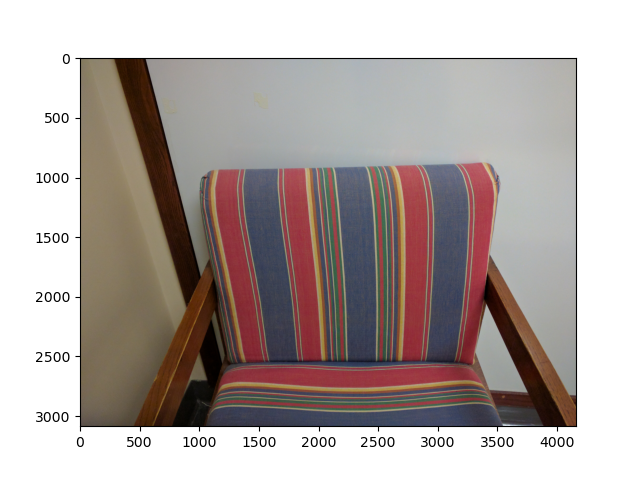

In [5]:
fig, ax = plt.subplots()
plt.imshow(image)

In [6]:
skio.imsave("data/chair.tiff", image)

#### Resizing Images

In [7]:
image.shape

(3088, 4160, 3)

In [8]:
new_shape = (image.shape[0] // 10, image.shape[1] // 10, image.shape[2])

In [9]:
new_shape

(308, 416, 3)

In [10]:
small = skimage.transform.resize(image=image, output_shape=new_shape)
small.dtype

dtype('float64')

In [11]:
small = skimage.img_as_ubyte(small)
small.dtype

dtype('uint8')

In [12]:
# save small as JPEG
skio.imsave("data/resized.jpg", small)

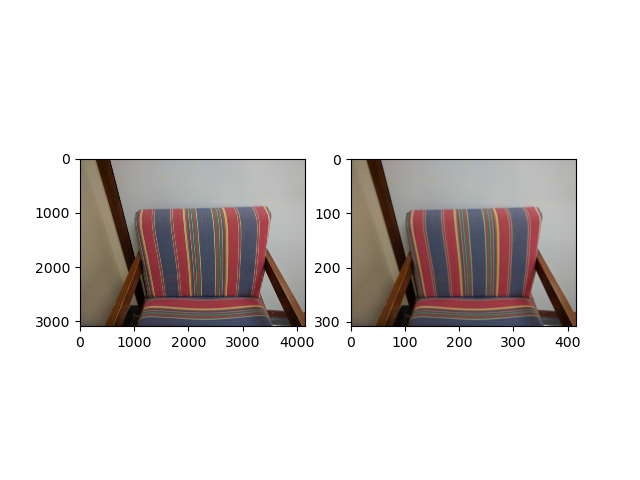

In [13]:
# plot original and small side-by-side
fig, ax = plt.subplots(1,2)
ax[0].imshow(image)
ax[1].imshow(small)

### Manipulating pixels

In [14]:
root = skio.imread("data/maize-root-cluster.jpg")

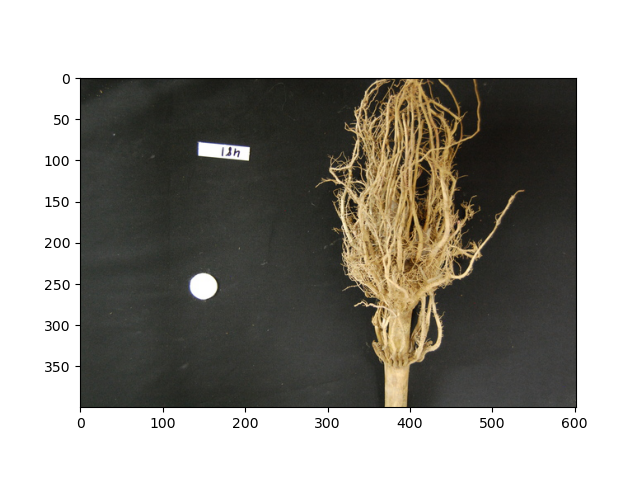

In [15]:
fig, ax = plt.subplots()
plt.imshow(root)

In [16]:
# keep only high-intensity pixels
root[root<128] = 0

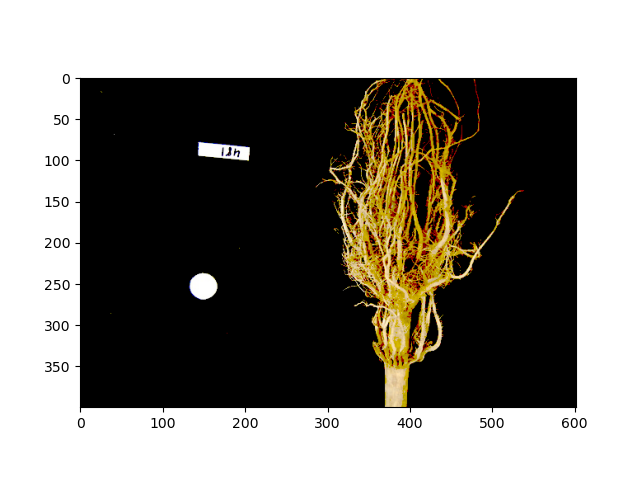

In [17]:
# displaying the modified images
fig, ax = plt.subplots()
plt.imshow(root)

#### Converting color images to grayscale

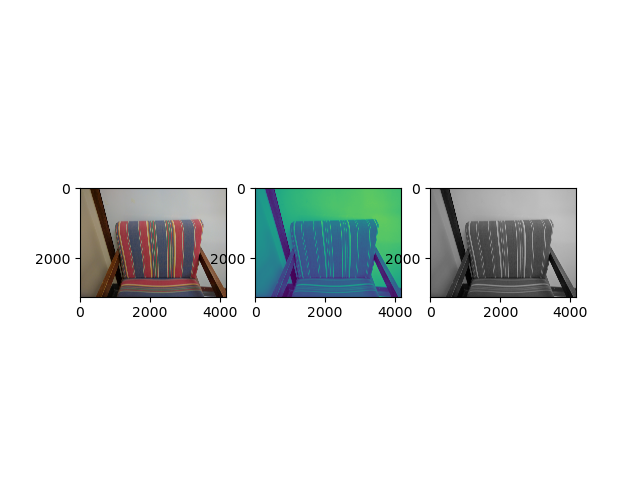

In [18]:
import skimage.color
chair = skio.imread("data/chair.jpg")
fig, ax = plt.subplots(1,3)
ax[0].imshow(chair)
gray_chair = skimage.color.rgb2gray(chair) # convert picture to grayscale
ax[1].imshow(gray_chair)
ax[2].imshow(gray_chair, cmap="gray")

In [19]:
print(chair)

[[[127 122 100]
  [127 122 100]
  [128 122 100]
  ...
  [173 173 165]
  [173 174 166]
  [174 175 167]]

 [[127 122 100]
  [127 122 100]
  [128 122 100]
  ...
  [175 175 167]
  [175 176 168]
  [176 177 169]]

 [[128 122 100]
  [128 122 100]
  [127 121  99]
  ...
  [176 176 168]
  [175 176 168]
  [175 176 168]]

 ...

 [[ 93  83  74]
  [ 87  77  68]
  [ 83  73  64]
  ...
  [117  67  42]
  [118  68  43]
  [120  68  44]]

 [[ 88  78  69]
  [ 86  76  67]
  [ 85  75  66]
  ...
  [117  67  42]
  [118  68  43]
  [119  67  43]]

 [[ 83  73  64]
  [ 87  77  68]
  [ 90  80  71]
  ...
  [117  67  42]
  [117  67  42]
  [115  63  39]]]


In [20]:
print(gray_chair)

[[0.47637765 0.47637765 0.47721098 ... 0.67616941 0.67925765 0.68317922]
 [0.47637765 0.47637765 0.47721098 ... 0.68401255 0.68710078 0.69102235]
 [0.47721098 0.47721098 0.47328941 ... 0.68793412 0.68710078 0.68710078]
 ...
 [0.33127882 0.30774941 0.29206314 ... 0.29734314 0.30126471 0.30321412]
 [0.31167098 0.30382784 0.29990627 ... 0.29734314 0.30126471 0.29929255]
 [0.29206314 0.30774941 0.31951412 ... 0.29734314 0.29734314 0.28360627]]


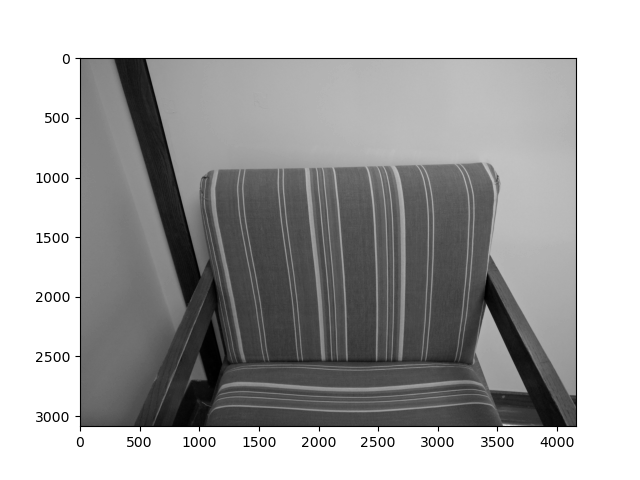

In [21]:
# load image as grayscale image
io_gray_image = skio.imread("data/chair.jpg", as_gray=True)
# display grayscale image
fig, ax = plt.subplots()
plt.imshow(io_gray_image, cmap="gray")

#### Keep only low-intensity pixels
A little earlier, we worked on how to turn on only the high intensity pixels from an image, while turning all the low intensity pixels off. Now, we will do the opposite - keeping all the low intensity pixels while changing the high intensity ones. 
The sudoku picture is an RGB image of a sudoku puzzle. The task is to turn all of the white pixels in the image to a light gray colour, say with the intensity of each formerly white pixel set to 64. 

In [22]:
sudoku = skio.imread("data/sudoku.png", as_gray = True)

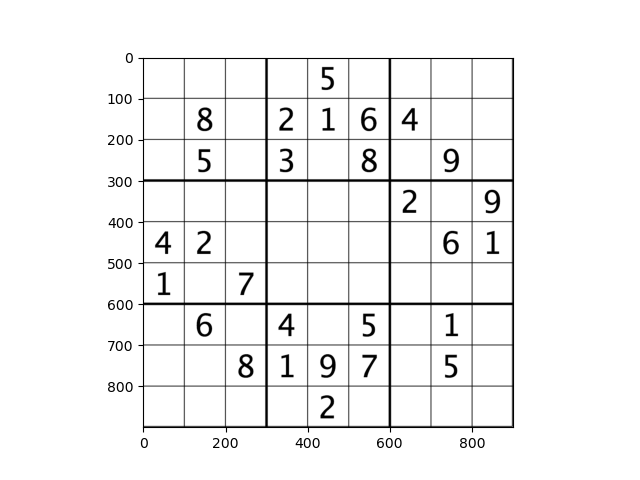

In [23]:
fig, ax = plt.subplots()
plt.imshow(sudoku, cmap='gray')

In [24]:
sudoku = skimage.img_as_ubyte(sudoku) # convert the pixels in the image to map to a range of 0-255
# takes 8 byte to store value between 0 and 255
# takes 4 bytes to store value between 0 and 1
sudoku[sudoku > 200] = 64

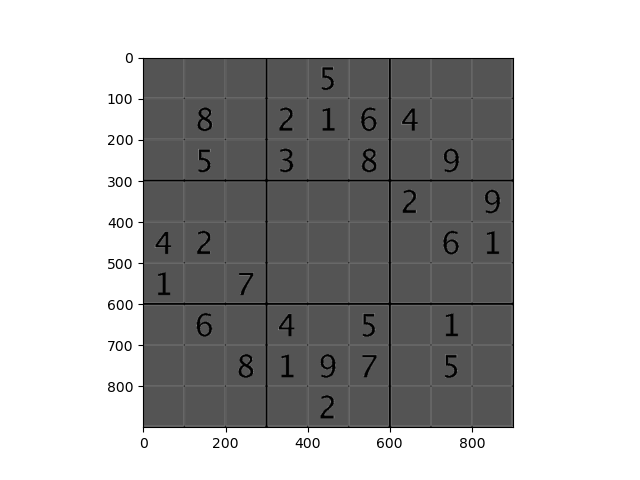

In [25]:
plt.subplots()
plt.imshow(sudoku, cmap = "gray")

### Access via Slicing

Working with images is the same as working with a big batch of numbers. The pixels an be thought of series of invidual rows and columns. Specify the rows you want to grab out and then specify the columns of these rows that you want.

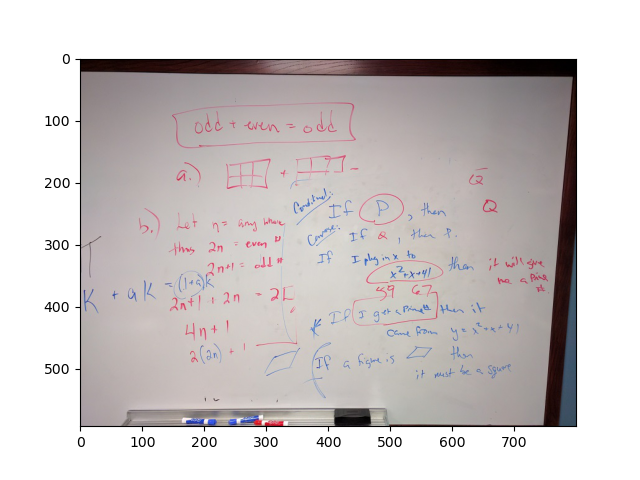

In [27]:
# Cropping

board = skio.imread("data/board.jpg")
plt.subplots()
plt.imshow(board)

In [28]:
print(board)

[[[ 16   5   3]
  [ 17   6   4]
  [ 17   6   4]
  ...
  [ 30  31  36]
  [ 29  30  35]
  [ 30  31  36]]

 [[ 17   6   4]
  [ 18   7   5]
  [ 18   7   5]
  ...
  [ 11  12  17]
  [  9  10  15]
  [ 11  12  17]]

 [[ 13   2   0]
  [ 14   3   1]
  [ 14   3   1]
  ...
  [  0   0   4]
  [  0   0   4]
  [  0   0   4]]

 ...

 [[162 152 160]
  [162 152 160]
  [163 153 161]
  ...
  [ 54  76  90]
  [ 55  77  91]
  [ 57  79  93]]

 [[162 152 160]
  [162 152 160]
  [163 153 161]
  ...
  [ 53  75  89]
  [ 55  77  90]
  [ 58  80  93]]

 [[163 153 162]
  [165 153 163]
  [165 153 163]
  ...
  [ 58  77  92]
  [ 56  75  90]
  [ 55  77  91]]]


In [29]:
# put y coordinates first. This is because in linear algebra you put rows before columns. Row corresponds to the vertical line which is 
#represented by y in coordinate system.

#Pixels that we want to crop
top_left = (130, 65) # (x,y)
bottom_right = (456, 148)

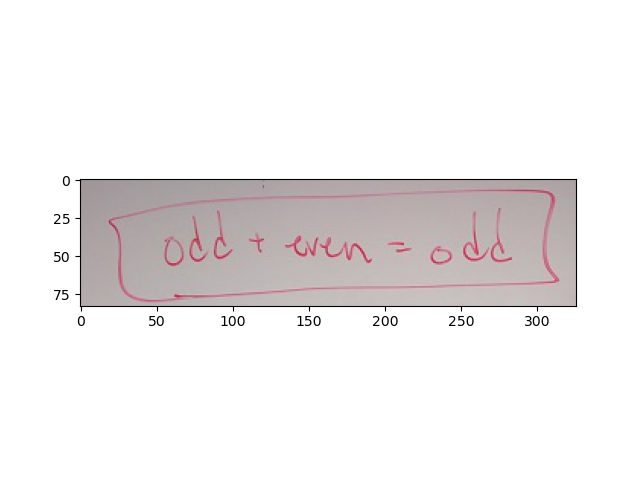

In [30]:
# Put y in first, then x
# The image is 3 dimensional and last slice represents the color that you want. So you add : to let all colours of the image come in
clip = board[65:148, 130:456, :]
plt.subplots()
plt.imshow(clip)

Because this was saved as a JPEG file and so you can the see the loss of information in the image because the image is squeezed to save the memory that is used up on the disk.

In [31]:
# saving the cropped image
skio.imsave("data/clip.png", arr= clip)

In [34]:
# replacing the cropped image with some color
# useful to replace biometrics or confidential information
color = board[116, 141]

In [35]:
color

array([176, 167, 168], dtype=uint8)

In [39]:
board[65:148, 130:456] = color

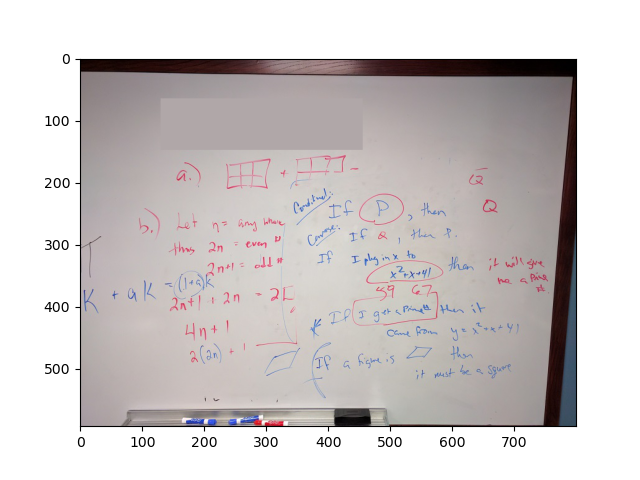

In [40]:
plt.subplots()
plt.imshow(board)

#### Practicing with slices

A script that creates, displays, and saves a sub-image containing only the plant and its roots from `data/maize-root-cluster.jpg`

In [41]:
root = skio.imread("data/maize-root-cluster.jpg")

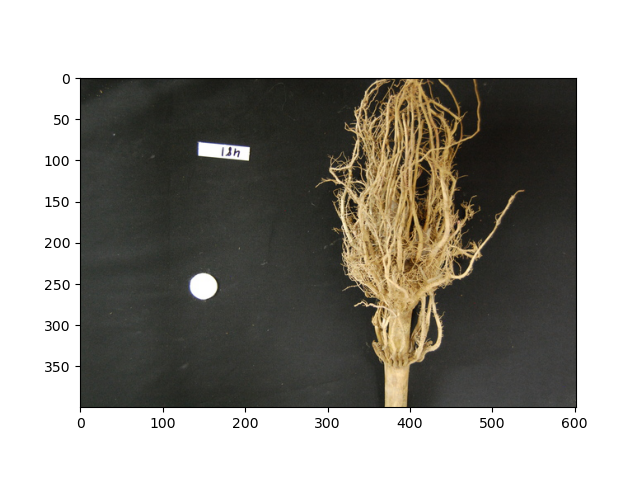

In [42]:
plt.subplots()
plt.imshow(root)

In [45]:
top_left = (275, 0)
bottom_right =(550, 399)

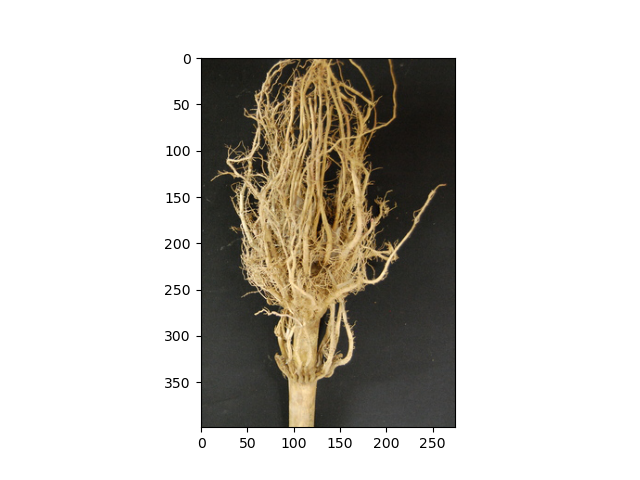

In [46]:
new_root = root[0:399, 275:550, :]
plt.subplots()
plt.imshow(new_root)

In [48]:
skio.imsave("data/new_root.jpg", arr = new_root)